# Environment Check #

First, click the _Runtime_ dropdown above in colab, at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Next, check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [1]:
!nvidia-smi

Mon Dec 12 17:20:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Environment Setup: #
Set up script installs
1. Updates gcc in Colab
1. Installs Conda
1. Install RAPIDS' current stable version of its libraries, as well as some external libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Copy RAPIDS .so files into current working directory, a neccessary workaround for RAPIDS+Colab integration.


In [2]:
!sudo add-apt-repository universe

'universe' distribution component is already enabled for all sources.


In [3]:
!sudo apt update 
!sudo apt install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 
!sudo update-alternatives --config python3
!python --version

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://archive.ubuntu.co

In [4]:
!curl https://bootstrap.pypa.io/get-pip.py --output get-pip.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2509k  100 2509k    0     0  36.5M      0 --:--:-- --:--:-- --:--:-- 36.0M


In [5]:
!sudo python3 get-pip.py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [6]:
!pip install pynvml --root-user-action=ignore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.0/47.0 kB 6.7 MB/s eta 0:00:00


In [7]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and
# the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS
# compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 308 (delta 79), reused 98 (delta 55), pack-reused 171
Receiving objects: 100% (308/308), 89.88 KiB | 12.84 MiB/s, done.
Resolving deltas: 100% (141/141), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  
# Don't run the next cell until you see the session crash. It will crash...
# You got to wait like 5 mins or so! .. Don't panic!! just wait patiently...
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [20.8 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://

In [1]:
# Note! Please check that your colab is connacted before running this cell.
# After waiting above.... 
# Now run the rest of the cells as normal.. 
import condacolab
condacolab.install()

‚è¨ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:16
üîÅ Restarting kernel...


In [1]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 38.0.4
Uninstalling cryptography-38.0.4:
  Successfully uninstalled cryptography-38.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 446.7/446.7 kB 12.7 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(652): pinned spec python=3.8 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(652): pinned sp

# cuDF and cuML Examples #

Now you can run code! 

What follows are basic examples where all processing takes place on the GPU.

#[cuDF](https://github.com/rapidsai/cudf)#

Load a dataset into a GPU memory resident DataFrame and perform a basic calculation.

Everything from CSV parsing to calculating tip percentage and computing a grouped average is done on the GPU.

_Note_: You must import nvstrings and nvcategory before cudf, else you'll get errors.

In [ ]:
import cudf
import io, requests

# download CSV file from GitHub
url="https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

# read CSV from memory
tips_df = cudf.read_csv(io.StringIO(content))
tips_df['tip_percentage'] = tips_df['tip']/tips_df['total_bill']*100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name: tip_percentage, dtype: float64


#[cuML](https://github.com/rapidsai/cuml)#

This snippet loads a 

As above, all calculations are performed on the GPU.

In [ ]:
import cuml

# Create and populate a GPU DataFrame
df_float = cudf.DataFrame()
df_float['0'] = [1.0, 2.0, 5.0]
df_float['1'] = [4.0, 2.0, 1.0]
df_float['2'] = [4.0, 2.0, 1.0]

# Setup and fit clusters
dbscan_float = cuml.DBSCAN(eps=1.0, min_samples=1)
dbscan_float.fit(df_float)

print(dbscan_float.labels_)

0    0
1    1
2    2
dtype: int32


# Next Steps #

For an overview of how you can access and work with your own datasets in Colab, check out [this guide](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).

For more RAPIDS examples, check out our RAPIDS notebooks repos:
1. https://github.com/rapidsai/notebooks
2. https://github.com/rapidsai/notebooks-contrib

In [ ]:
!pip install "autogluon.tabular[all]==0.1.1b20210312"
!pip install AutoViz
!pip install xlrd

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 234 kB 3.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 280 kB 12.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.8 MB 304 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48 kB 6.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25.9 MB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 312 kB 76.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 449 kB 73.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65.7 MB 15 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.5 MB 3.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 285 kB 68.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119 kB 62.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 54 kB 3.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 231 kB 67.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 96 kB 2.2 MB/s 


In [ ]:
import pandas as pd
dfe = pd.read_csv('/content/train.csv')

from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

In [ ]:
dfe.head()

PassengerId  Survived  Pclass  ...   Fare   Cabin  Embarked
0            0         1       1  ...  27.14  C12239         S
1            1         0       3  ...  13.35     NaN         S
2            2         0       3  ...  71.29     NaN         S
3            3         0       3  ...  13.04     NaN         S
4            4         1       3  ...   7.76     NaN         S

[5 rows x 12 columns]

Shape of your Data Set: (100000, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Since Number of Rows in data 100000 exceeds maximum, randomly sampling 100000 rows for EDA...

################ Binary_Classification VISUALIZATION Started #####################


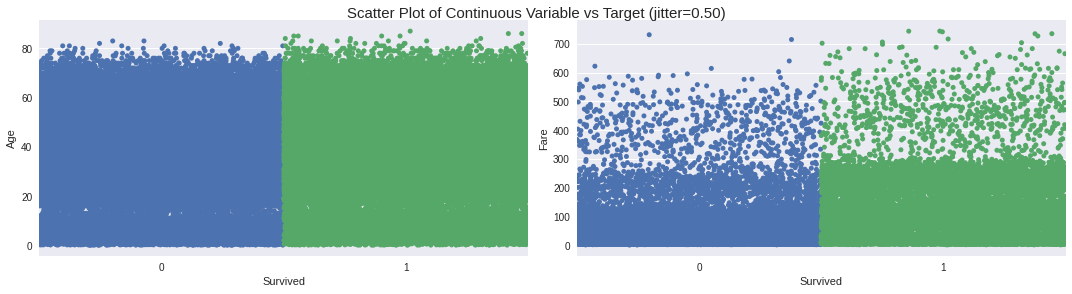

Total Number of Scatter Plots = 3


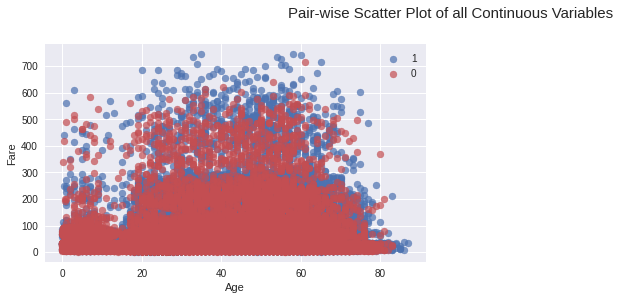

Could not draw Distribution Plots


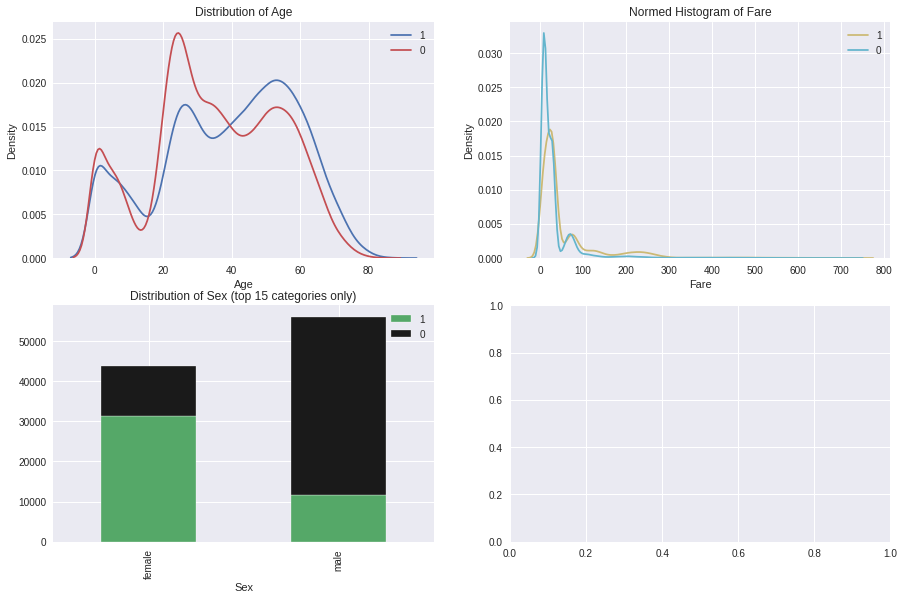

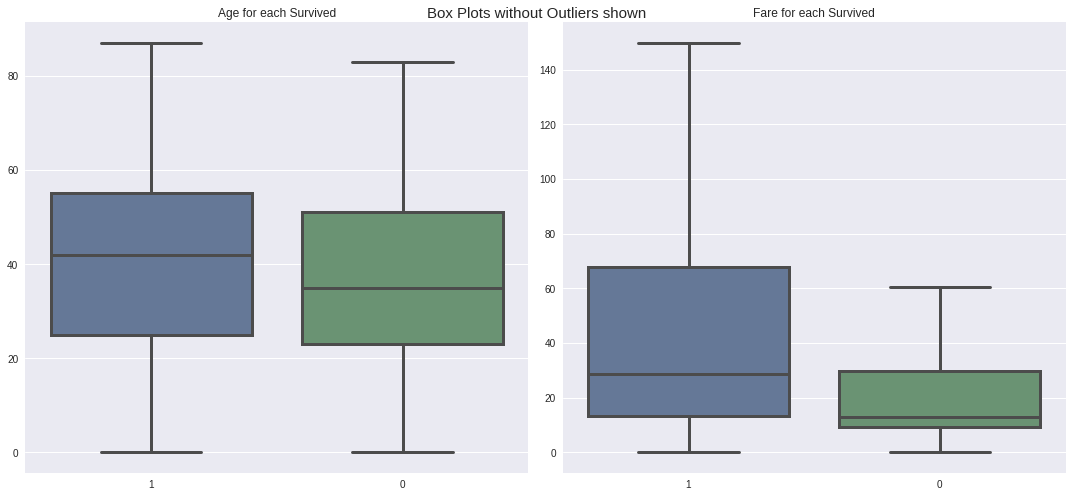

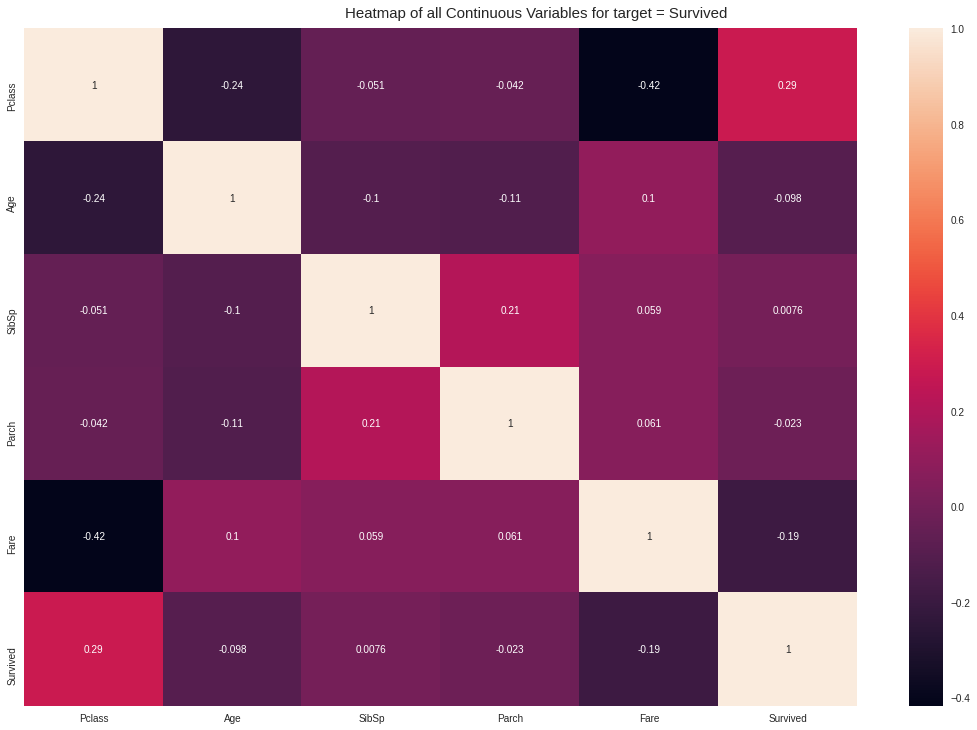

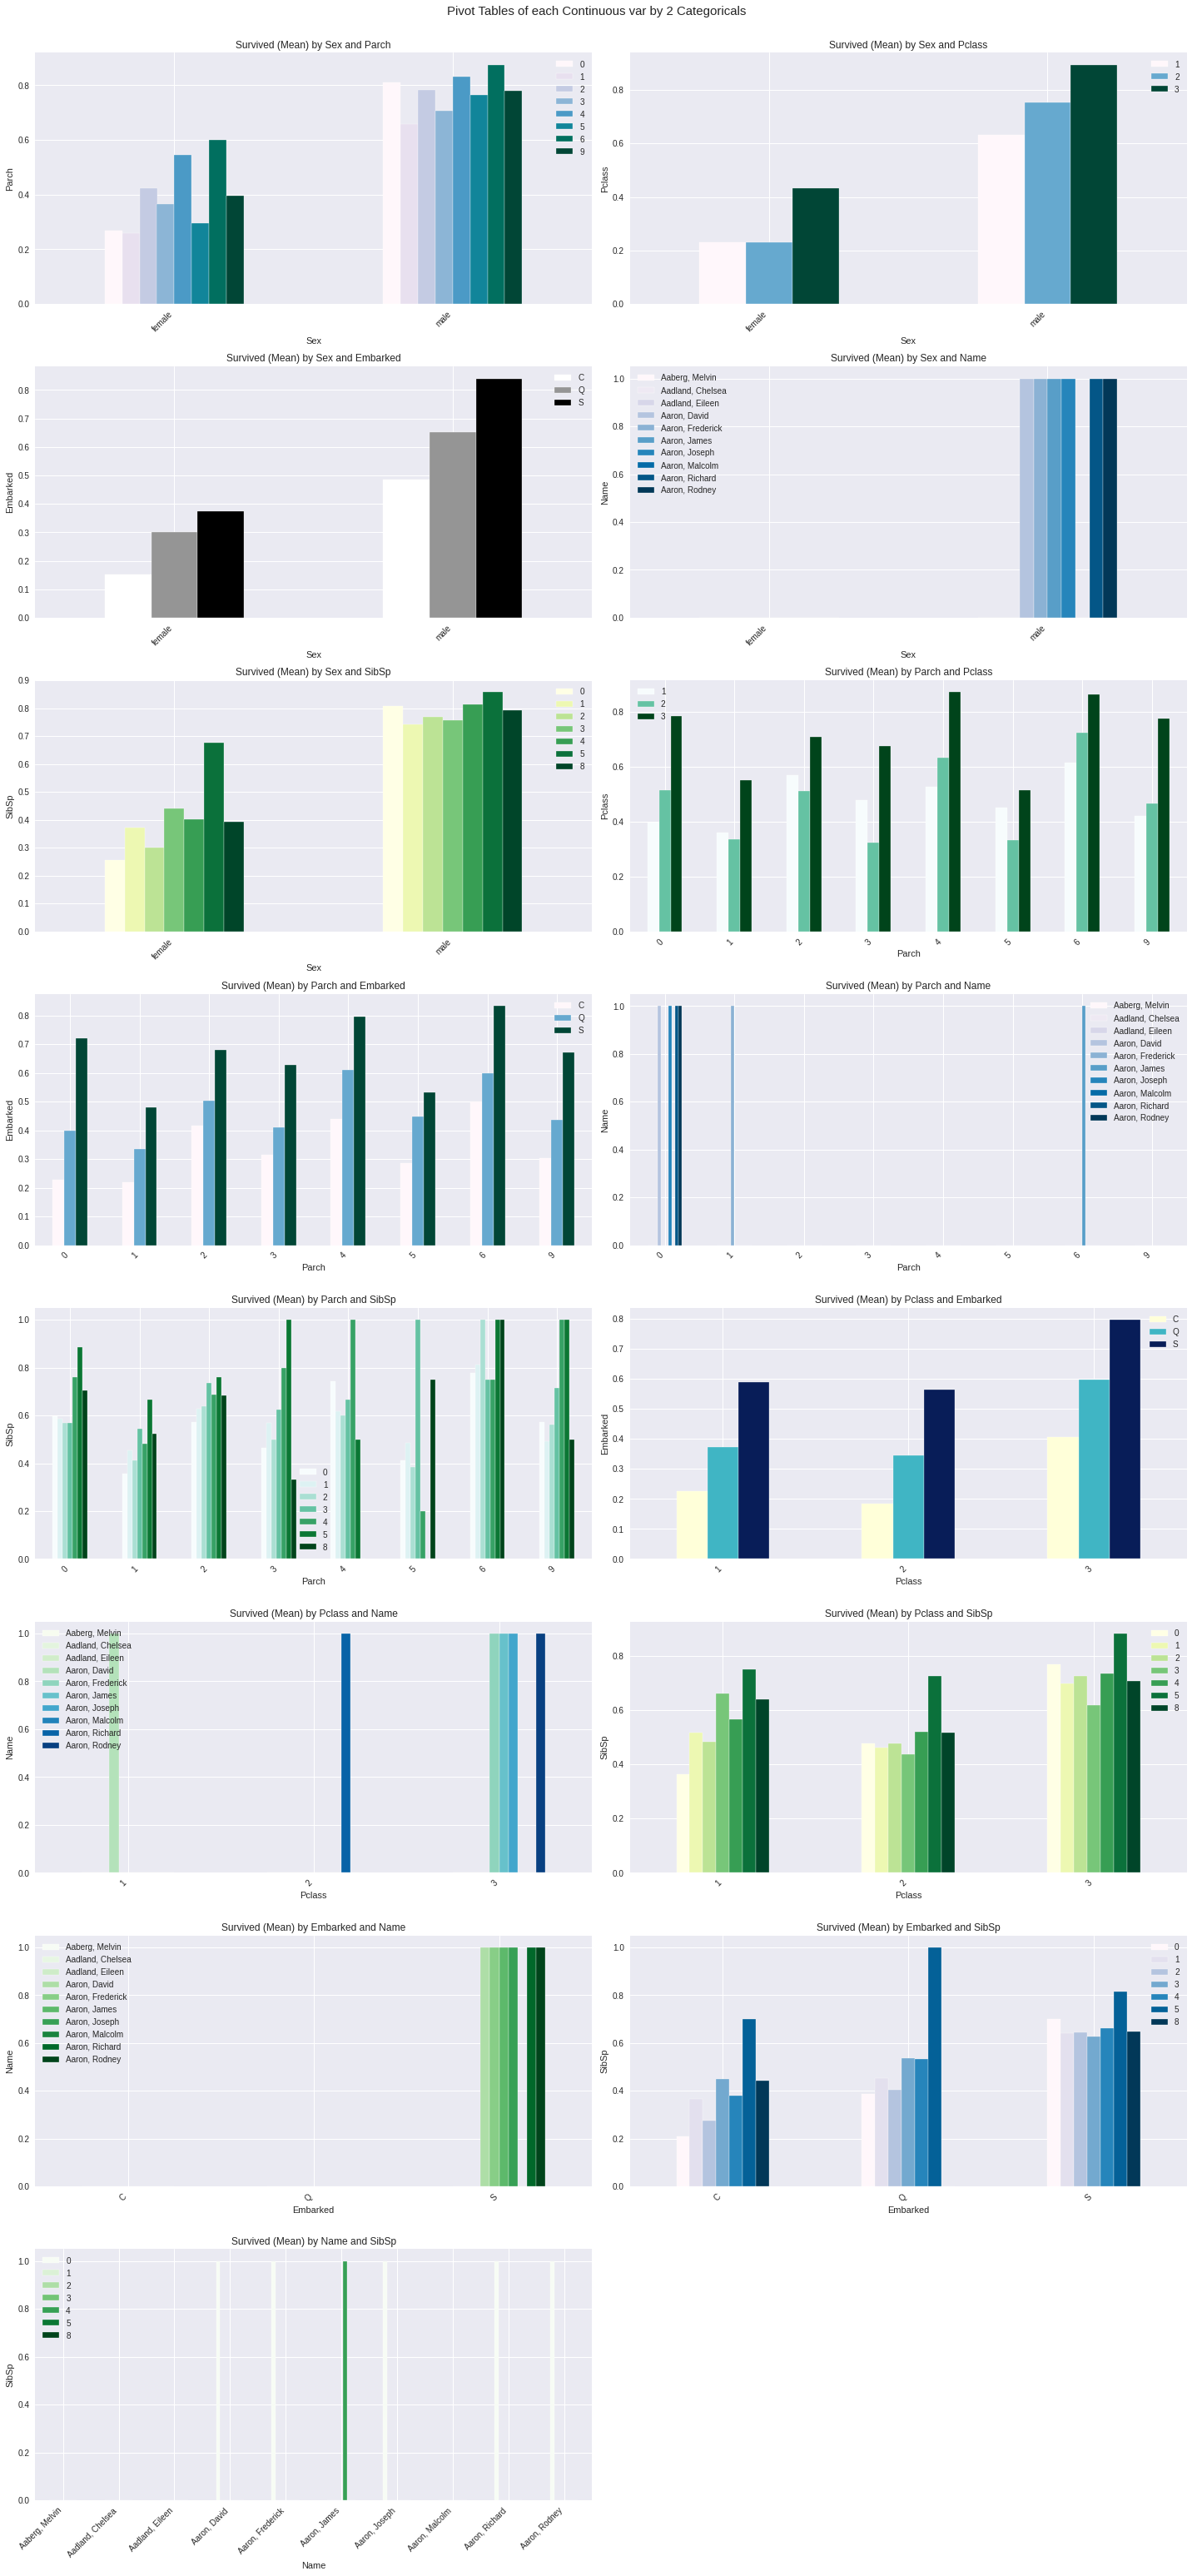

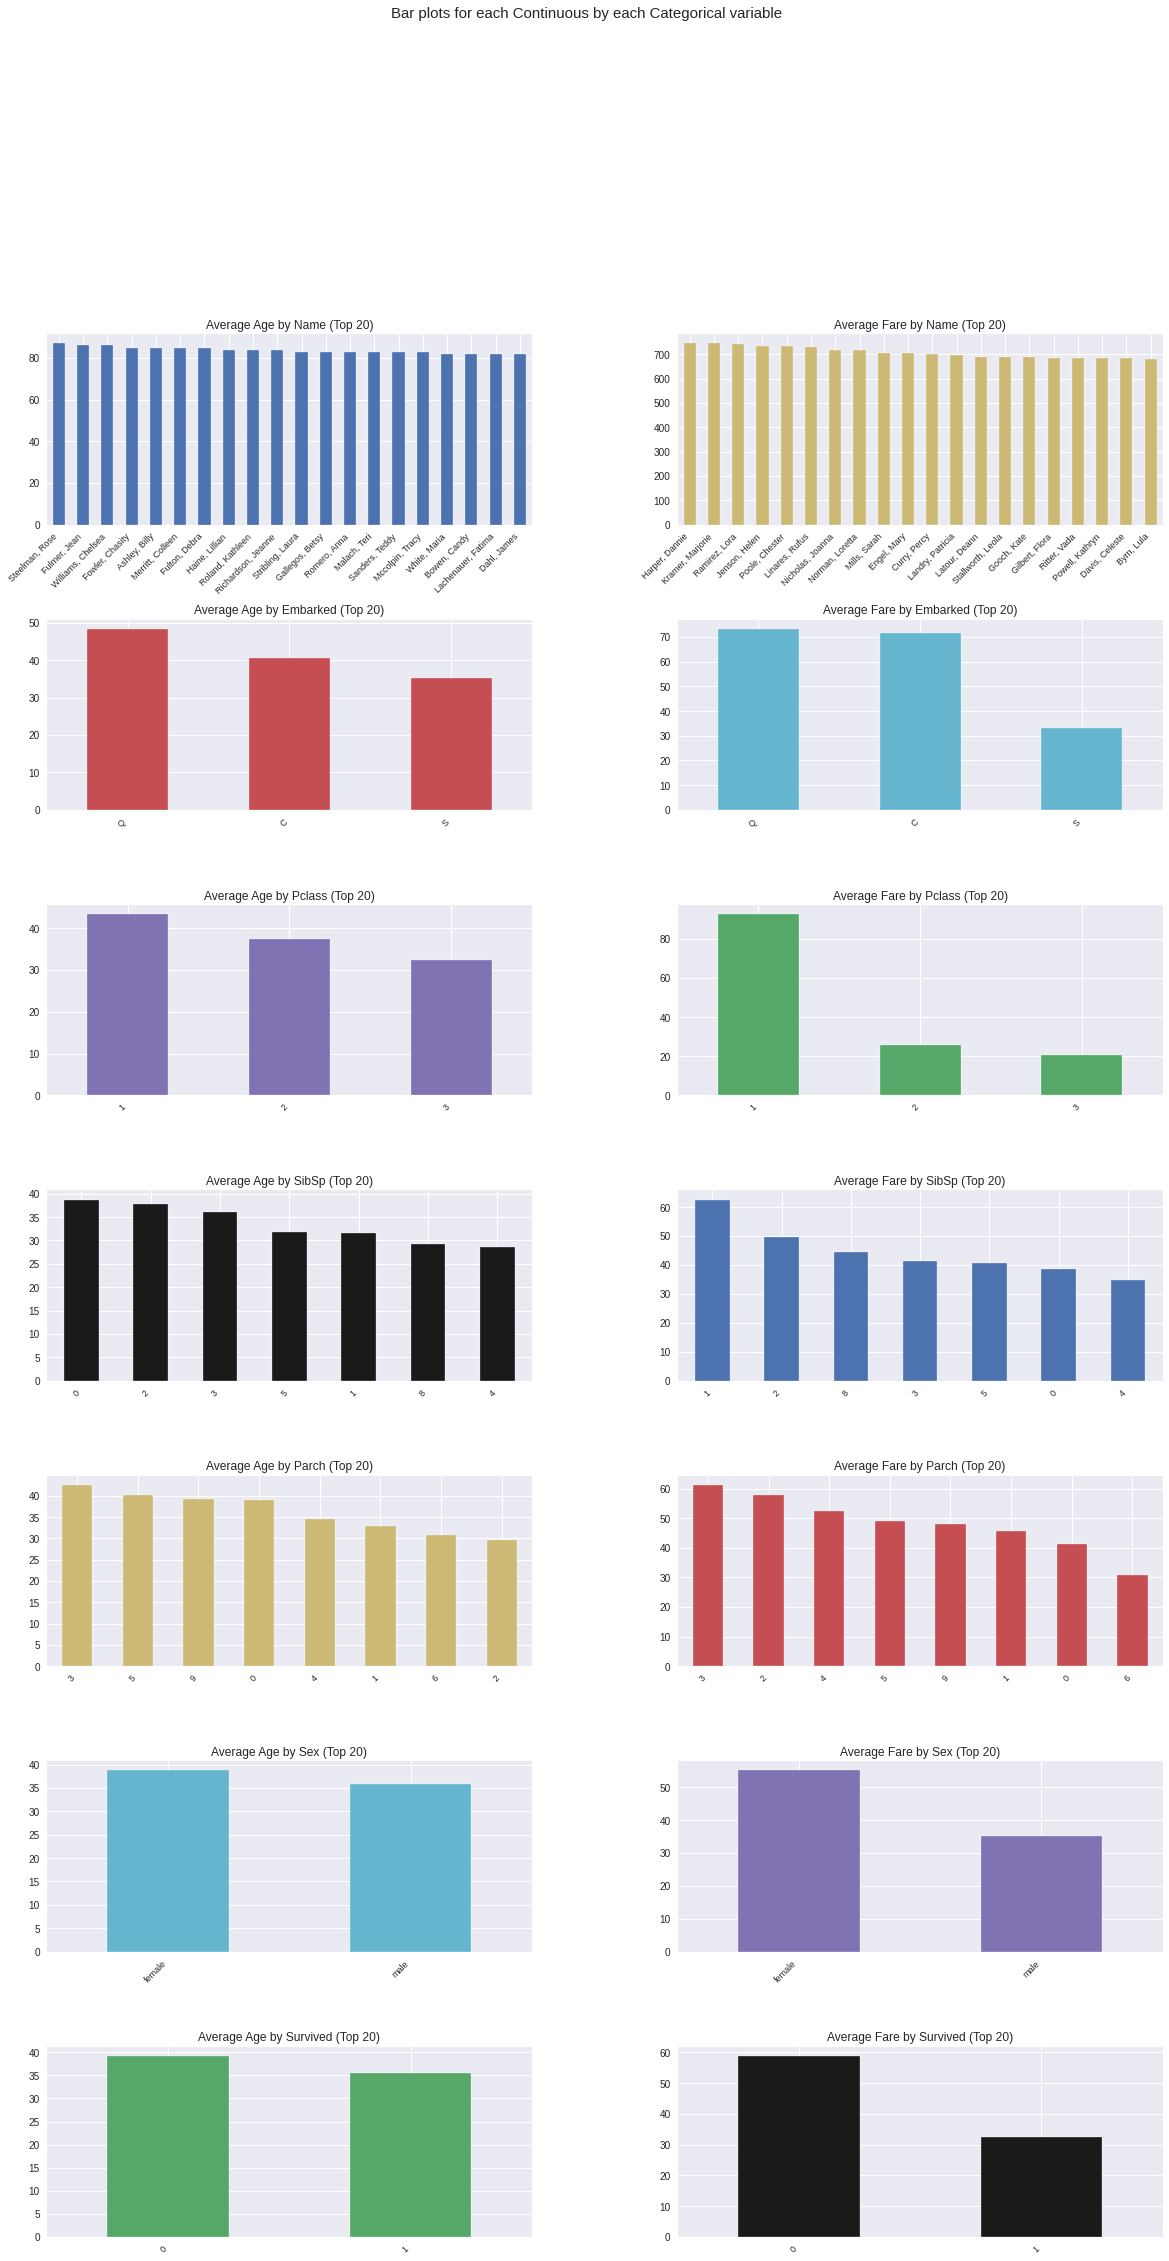

Time to run AutoViz (in seconds) = 14.904

 ###################### VISUALIZATION Completed ########################


In [ ]:
dftc = AV.AutoViz(filename='', 
                  sep ='' , 
                  depVar ='Survived', 
                  dfte = dfe, 
                  header = 0, 
                  verbose = 0, 
                  lowess = False, 
                  chart_format ='png', 
                  max_rows_analyzed = 100000, 
                  max_cols_analyzed = 30
)

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.tabular.models.lr.lr_rapids_model import LinearRapidsModel
from autogluon.tabular.models.knn.knn_rapids_model import KNNRapidsModel

train_data = TabularDataset('/content/train.csv')
test_data = TabularDataset('/content/test.csv')

label = 'Survived'

Loaded data from: /content/train.csv | Columns = 12 / 12 | Rows = 100000 -> 100000
Loaded data from: /content/test.csv | Columns = 11 / 11 | Rows = 100000 -> 100000


In [ ]:
train_data

PassengerId  Survived  Pclass  ...   Fare   Cabin  Embarked
0                0         1       1  ...  27.14  C12239         S
1                1         0       3  ...  13.35     NaN         S
2                2         0       3  ...  71.29     NaN         S
3                3         0       3  ...  13.04     NaN         S
4                4         1       3  ...   7.76     NaN         S
...            ...       ...     ...  ...    ...     ...       ...
99995        99995         1       2  ...  14.86  D17243         C
99996        99996         0       2  ...  11.15     NaN         S
99997        99997         0       3  ...   9.95     NaN         S
99998        99998         0       3  ...  30.92     NaN         S
99999        99999         0       3  ...  13.96     NaN         S

[100000 rows x 12 columns]

In [ ]:
#using integrated RAPIDS models along with some boosting models
predictor = TabularPredictor(
    label=label,
    eval_metric='accuracy',
    learner_kwargs={'ignored_columns': ['PassengerId']}
).fit(
    train_data,
    presets='best_quality',
    hyperparameters={'XGB': {'ag_args_fit': {'num_gpus': 1}},
        'GBM': [{}, {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, 'GBMLarge'],
        'NN': {'ag_args_fit': {'num_gpus': 1}},
        'CAT': {'ag_args_fit': {'num_gpus': 1}},
        KNNRapidsModel: {},
        LinearRapidsModel: {},
       
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20210622_192223/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210622_192223/"
AutoGluon Version:  0.1.1b20210312
Train Data Rows:    100000
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['PassengerId']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    22458.9 MB
	Train Data (Original)  Memory Usage: 34.29 MB (0.2% of available memory)
	Inferring data t

In [ ]:
test_data

PassengerId  Pclass                Name  ...    Fare   Cabin  Embarked
0           100000       3    Holliday, Daniel  ...   63.01     NaN         S
1           100001       3    Nguyen, Lorraine  ...    5.81     NaN         S
2           100002       1     Harris, Heather  ...   38.91  B15315         C
3           100003       2        Larsen, Eric  ...   12.93     NaN         S
4           100004       1       Cleary, Sarah  ...   26.89  B22515         C
...            ...     ...                 ...  ...     ...     ...       ...
99995       199995       3       Cash, Cheryle  ...   10.12     NaN         Q
99996       199996       1       Brown, Howard  ...   68.31     NaN         S
99997       199997       3  Lightfoot, Cameron  ...   10.87     NaN         S
99998       199998       1  Jacobsen, Margaret  ...   29.68  B20828         C
99999       199999       1    Fishback, Joanna  ...  195.41  E13345         C

[100000 rows x 11 columns]

In [ ]:
import pandas as pd
submission = test_data[['PassengerId']]
test_pred_proba = predictor.predict(test_data)
test_pred_proba=pd.DataFrame(test_pred_proba,columns=['Survived'])
submission = pd.concat([submission, test_pred_proba], axis=1)
submission.to_csv('submission.csv', index=False)
submission.head()

PassengerId  Survived
0       100000         0
1       100001         0
2       100002         1
3       100003         0
4       100004         1

In [ ]:
predictor.leaderboard(silent=True)